In [1]:
#import and alias

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set the seed - numpy
np.random.seed(1)

#style sheet - matplotlib.pyplot
plt.rcParams['figure.figsize'] = [12.0, 6.0]
plt.rcParams['figure.dpi'] = 80
plt.style.use('seaborn-darkgrid')

#context (style) - seaborn
sns.set_context("notebook")

In [3]:
#COVID-19/archived_data/archived_time_series
confirmed_df = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
#confirmed_df

In [5]:
#deaths_df

In [6]:
#recovered_df

In [7]:
confirmed_data_df = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date", value_name="Confirmed")
death_data_df = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date", value_name="Deaths")
recovered_data_df = recovered_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="Date",  value_name="Recovered")

In [8]:
#confirmed_data_df

In [9]:
#death_data_df

In [10]:
#recovered_data_df

In [11]:
#confirmed_data_df[confirmed_data_df["Confirmed"].isna()]

In [12]:
#death_data_df[death_data_df['Deaths'].isna()]

In [13]:
#recovered_data_df[recovered_data_df['Recovered'].isna()]

In [14]:
all_data_df = pd.concat([confirmed_data_df, death_data_df['Deaths'] , recovered_data_df['Recovered']], axis=1).reset_index().drop(['index'], axis=1)

In [15]:
#all_data_df

In [16]:
#all_data_df[all_data_df["Province/State"].isna()]

In [17]:
#all_data_df[all_data_df["Province/State"].isna()].head(50)

In [18]:
#all_data_df[all_data_df["Country/Region"].isna()]

In [19]:
#all_data_df[all_data_df["Confirmed"].isna()]

In [20]:
#all_data_df[all_data_df["Deaths"].isna()]

In [21]:
#all_data_df[all_data_df["Recovered"].isna()]

In [22]:
#all_data_df[all_data_df["Recovered"].isna()].head(50)

In [23]:
all_data_df[["Deaths", "Recovered", "Confirmed"]] = all_data_df[["Deaths", "Recovered", "Confirmed"]].apply(lambda row: row.fillna(0))

In [24]:
#all_data_df[all_data_df["Recovered"].isna()].head(50)

In [25]:
#all_data_df[all_data_df["Province/State"].isna()]["Country/Region"].unique()

In [26]:
#all_data_df

In [27]:
all_data_df.loc[:, "Date"] = all_data_df["Date"].apply(lambda s: pd.to_datetime(s).date())
latest_date = all_data_df["Date"].max()

In [28]:
#all_data_df

In [29]:
cro_data_df = all_data_df[(all_data_df["Country/Region"] == "Croatia")].sort_values('Date')

In [30]:
#cro_data_df

In [31]:
cro_data_df_conf = all_data_df[(all_data_df["Country/Region"] == "Croatia")&(all_data_df["Confirmed"] > 0)].sort_values('Date')

In [32]:
#cro_data_df_conf

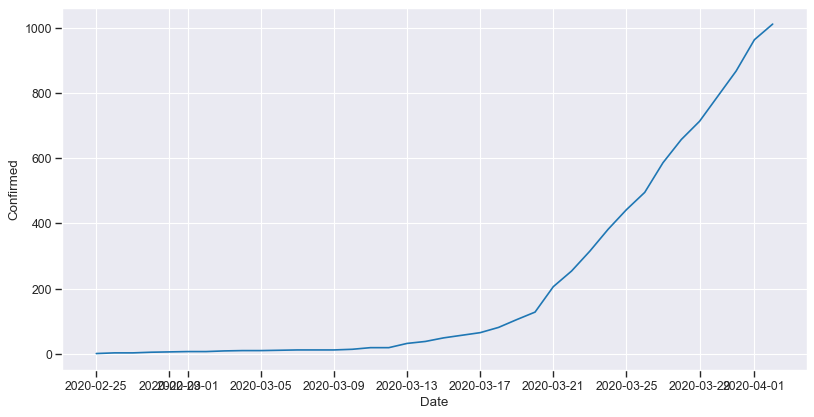

In [33]:
grid = sns.lineplot(data=cro_data_df_conf[(cro_data_df_conf["Confirmed"] > 0)], x="Date", y="Confirmed")

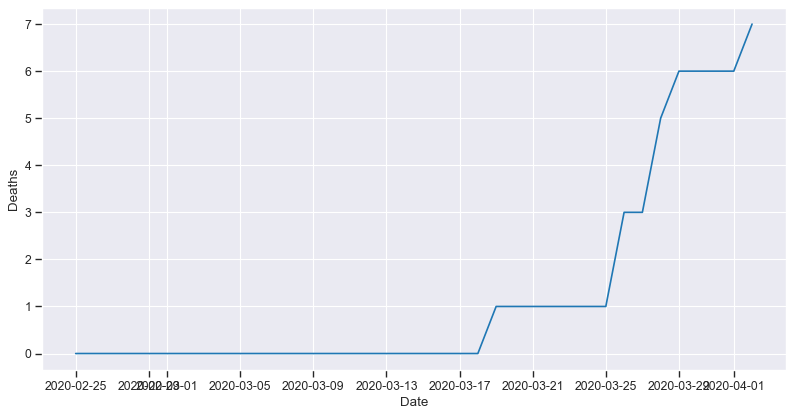

In [34]:
grid = sns.lineplot(data=cro_data_df_conf[(cro_data_df_conf["Confirmed"] > 0)], x="Date", y="Deaths")

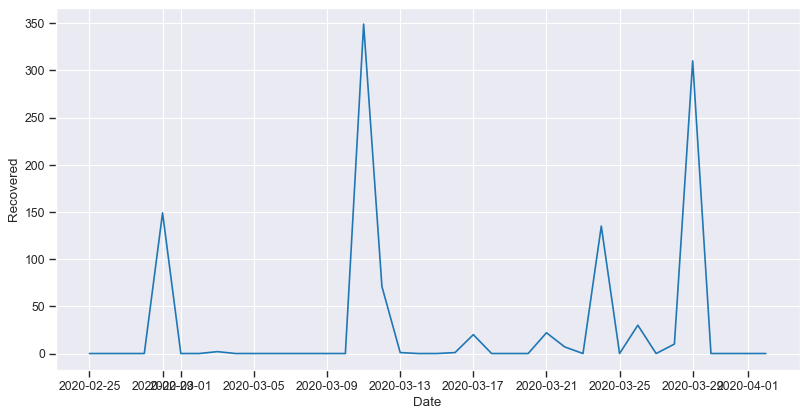

In [35]:
grid = sns.lineplot(data=cro_data_df_conf[(cro_data_df_conf["Confirmed"] > 0)], x="Date", y="Recovered")

In [36]:
import datetime

cro_data_df_conf['DateWeek'] = cro_data_df_conf['Date'].apply(lambda date_row: date_row.isocalendar()[1])
cro_data_df_conf['DayOfYear'] = cro_data_df_conf['Date'].apply(lambda date_row: date_row.timetuple().tm_yday)

In [37]:
#cro_data_df_conf

In [38]:
import numpy, scipy
from scipy.optimize import curve_fit
import warnings

np.set_printoptions(suppress=True)

In [39]:
def show_logistic_regression(x_data, y_data, title='Data projection', initial_params=np.array([1.0, 1.0, 1.0])):

    def logistic_equation(x, a, b, c):
        return a / (1.0 + np.power(x / b, c))

    fitted_parameters, pcov = curve_fit(logistic_equation, x_data, y_data, initial_params)

    model_predictions = logistic_equation(x_data, *fitted_parameters) 

    absolute_error = model_predictions - y_data

    squared_error = np.square(absolute_error)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    r_squared = 1.0 - (np.var(absolute_error) / np.var(y_data))

    print('Parameters:', fitted_parameters)
    print('RMSE:', root_mean_squared_error)
    print('R-squared:', r_squared)

    print()


    def scatter_plot():
        f = plt.figure(figsize=(16,10), dpi=100)
        axes = f.add_subplot(111)

        # Plot the actual data
        axes.plot(x_data, y_data, 'X')

        # Create model data
        x_model = numpy.linspace(min(x_data), max(x_data) + 40)
        y_model = logistic_equation(x_model, *fitted_parameters)

        # Plot model data
        axes.plot(x_model, y_model)

        axes.set_xlabel('Days in year')
        axes.set_ylabel('Confirmed cases')

        axes.set_title(title)

        axes.axvline(datetime.date.today().timetuple().tm_yday, 0, 1, color='red', linewidth=4)
        axes.axhline(fitted_parameters[0], 0, 1, color='blue', linewidth=4)


    scatter_plot()

Text(0.5, 1.0, 'Croatia confirmed cases')

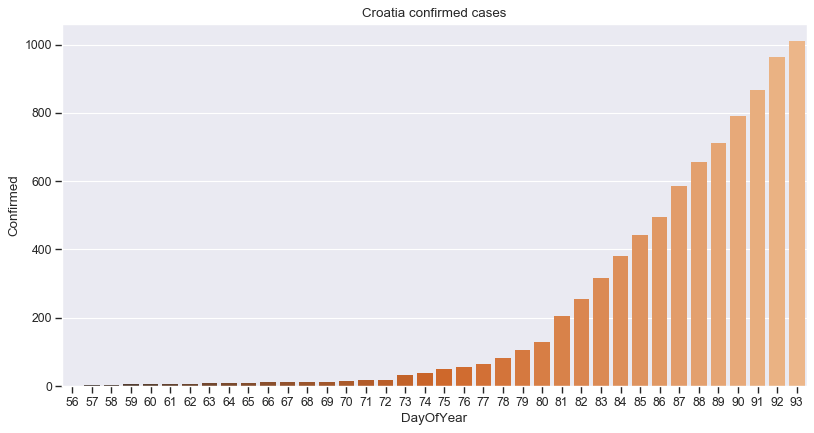

In [40]:
ax = sns.barplot(data=cro_data_df_conf, x="DayOfYear", y="Confirmed", ci="sd", palette="Oranges_d")
ax.set_title('Croatia confirmed cases')

Parameters: [1331.96287923   88.12660728  -20.69658637]
RMSE: 11.365864103701535
R-squared: 0.9986600578415235



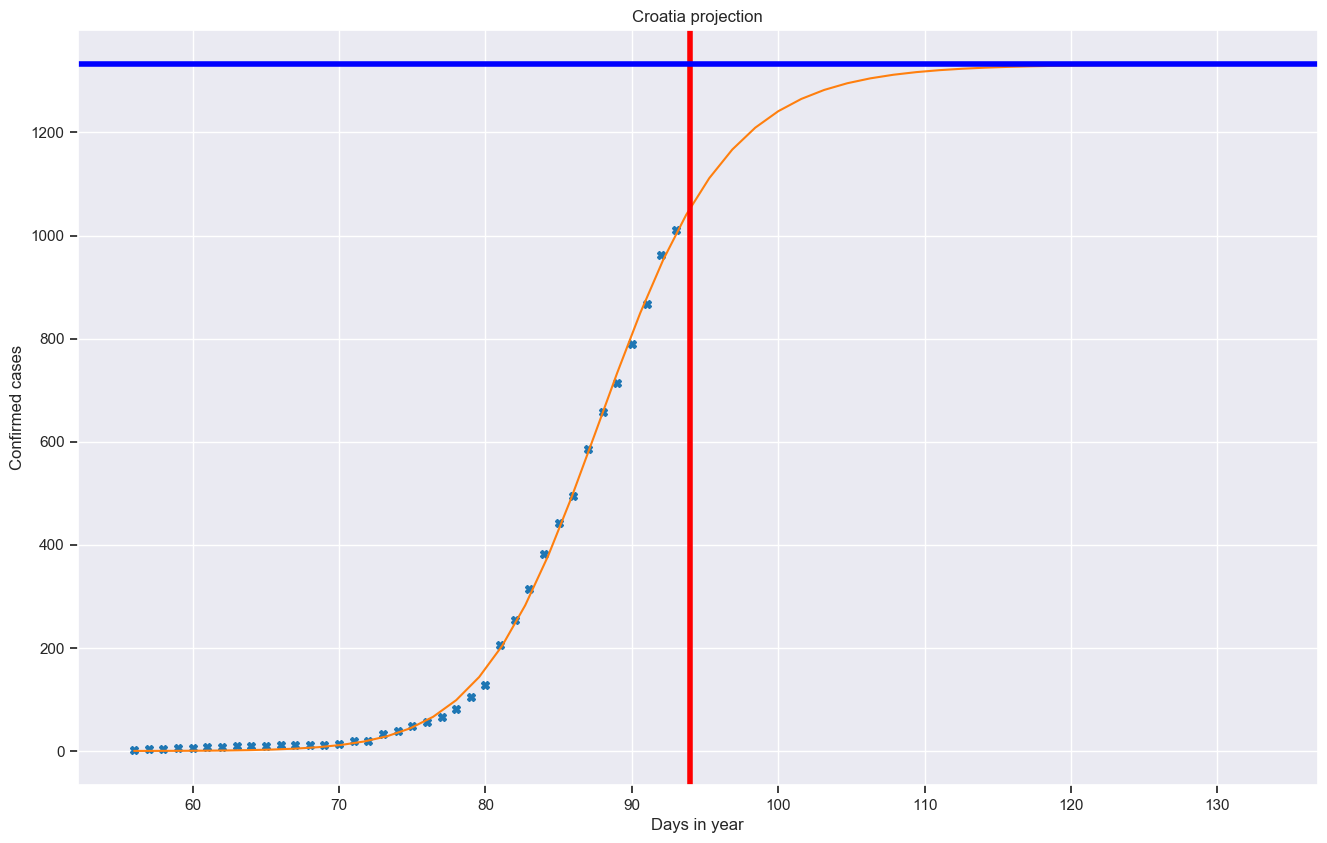

In [41]:
fit_data_df = cro_data_df_conf

x_data = fit_data_df['DayOfYear'].values
y_data = fit_data_df['Confirmed'].values

show_logistic_regression(x_data, y_data, title='Croatia projection')

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 100
variance = 10
sigma = math.sqrt(variance)


In [43]:
def show_gaussian_regression(x_data, y_data, title='Data projection', params=np.array([1.0, 1.0, 1.0])):

    def gaussian_equation(x, size, mu, sig):
        return size * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

    fitted_parameters, pcov = curve_fit(gaussian_equation, x_data, y_data, params)

    model_predictions = gaussian_equation(x_data, *fitted_parameters) 

    absolute_error = model_predictions - y_data

    squared_error = np.square(absolute_error)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    r_squared = 1.0 - (np.var(absolute_error) / np.var(y_data))

    print('Parameters:', fitted_parameters)
    print('RMSE:', root_mean_squared_error)
    print('R-squared:', r_squared)

    print()


    def scatter_plot():
        f = plt.figure(figsize=(16,10), dpi=100)
        axes = f.add_subplot(111)

        # Plot the actual data
        axes.plot(x_data, y_data, 'X')

        # Create model data
        x_model = numpy.linspace(min(x_data), max(x_data) + 20)
        y_model = gaussian_equation(x_model, *fitted_parameters)

        # Plot model data
        axes.plot(x_model, y_model)

        axes.set_xlabel('Days in year')
        axes.set_ylabel('Confirmed cases')

        axes.set_title(title)

        #axes.axhline(fitted_parameters[0], 0, 1, color='blue', linewidth=4)


    scatter_plot()

In [44]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


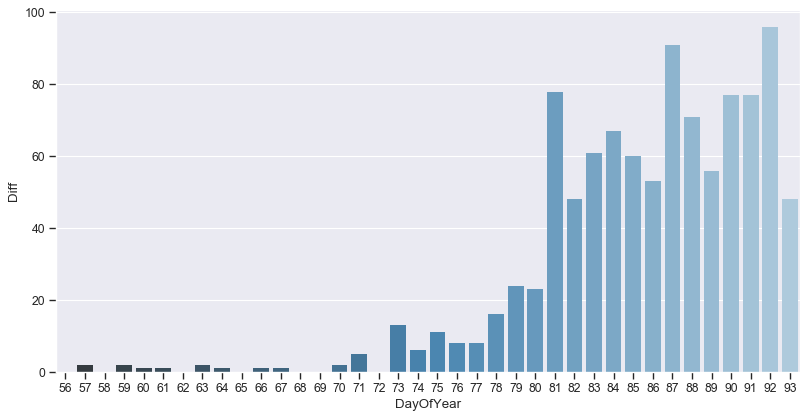

In [45]:
fit_df = cro_data_df_conf

fit_df['Diff'] = fit_df['Confirmed'].diff()
fit_df['GrowthFactor'] = fit_df['Diff'] / fit_df['Diff'].shift(-1)

sns.barplot(data=fit_df, x="DayOfYear", y="Diff", palette="Blues_d")

In [46]:
x = fit_df['DayOfYear'].fillna(0).values
y = fit_df['Diff'].fillna(0).values

Parameters: [100.  35.   1.]
RMSE: 41.26423199461324
R-squared: 0.0



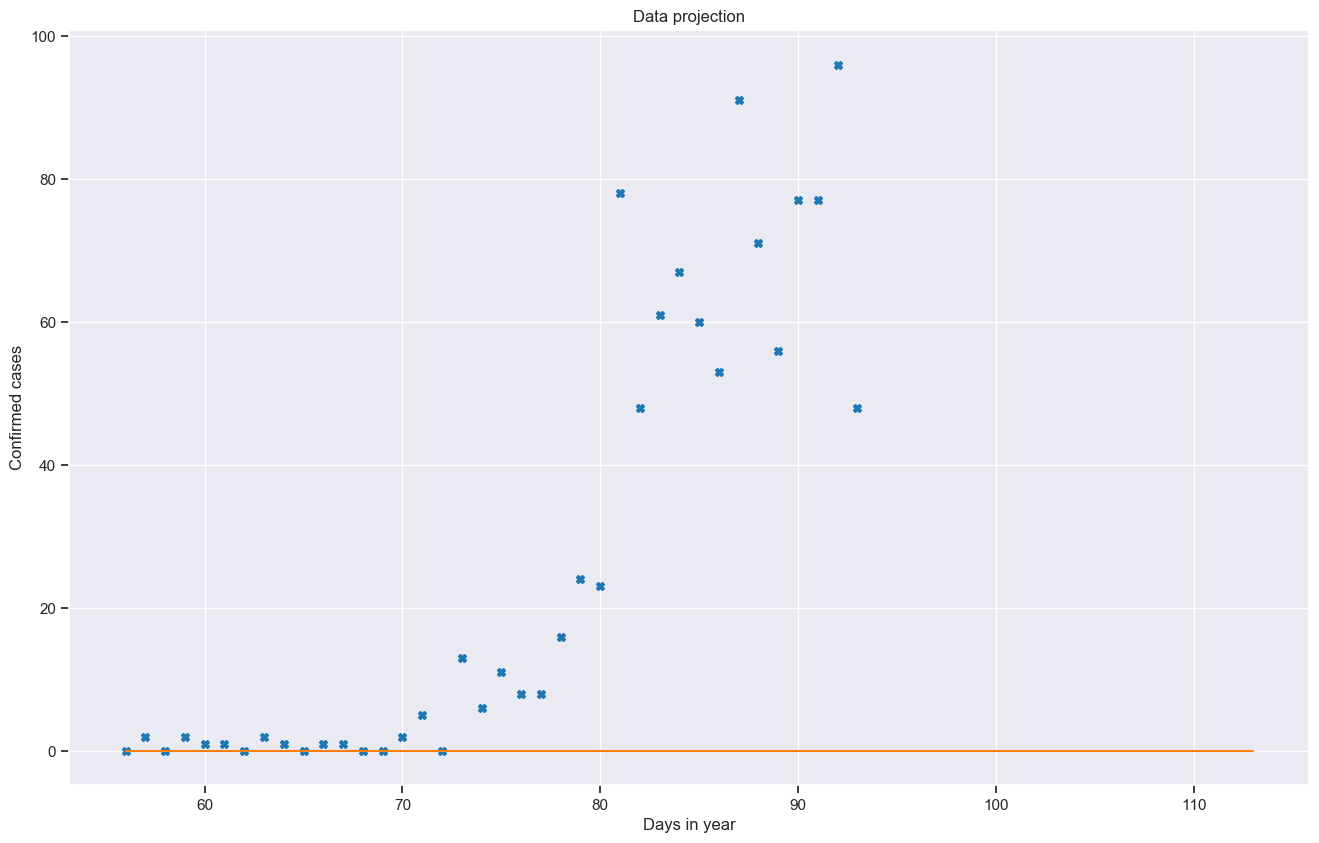

In [57]:
show_gaussian_regression(x, y, params=np.array([100.0, 35.0, 1.0]))

Parameters: [90. 15.  1.]
RMSE: 41.26423199461324
R-squared: 0.0



C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning:

Covariance of the parameters could not be estimated



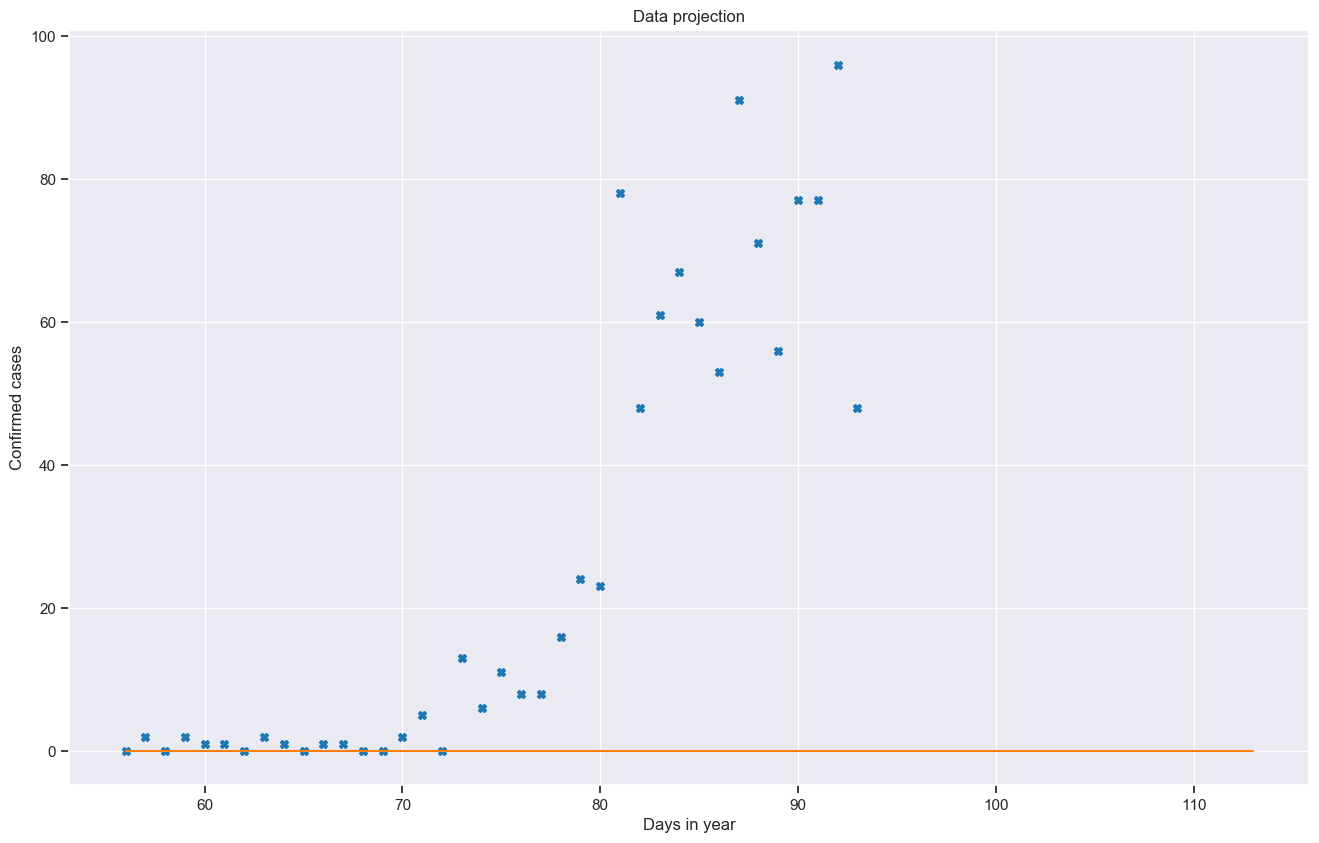

In [61]:
show_gaussian_regression(x, y, params=np.array([90.0, 15.0, 1.0]))

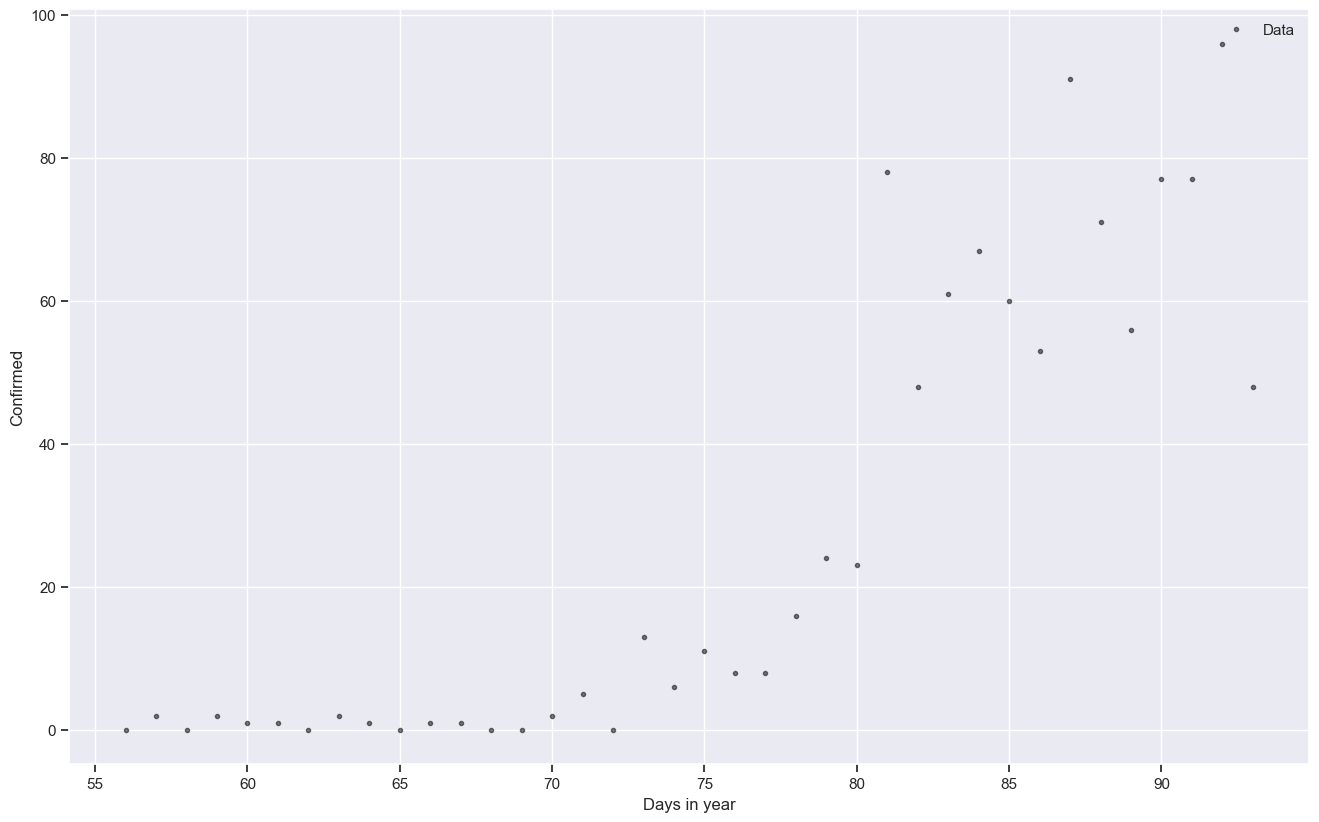

In [48]:
n = len(x) # The number of data points
X = x[:, None] # The inputs to the GP, they must be arranged as a column vector

## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(16,10), dpi=100)
ax = fig.gca()

ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data")
ax.set_xlabel("Days in year")
ax.set_ylabel("Confirmed");
plt.legend()

In [49]:
import theano.tensor as tt

def warp_func(x, a, b, c):
    return 1.0 + x + (a * tt.tanh(b * (x - c)))

with pm.Model() as model:
 
    ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    η = pm.HalfCauchy("η", beta=5)
    
    cov_exp = η**2 * pm.gp.cov.Matern52(1, ℓ)
    
    gp = pm.gp.Marginal(cov_func=cov_exp)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)

    mp = pm.find_MAP()

C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as a

In [50]:
# new values, we convert into column vector
X_new = np.linspace(50, 120, 40)[:,None]

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_posterior_predictive([mp], vars=[f_pred], samples=1000)

C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimen

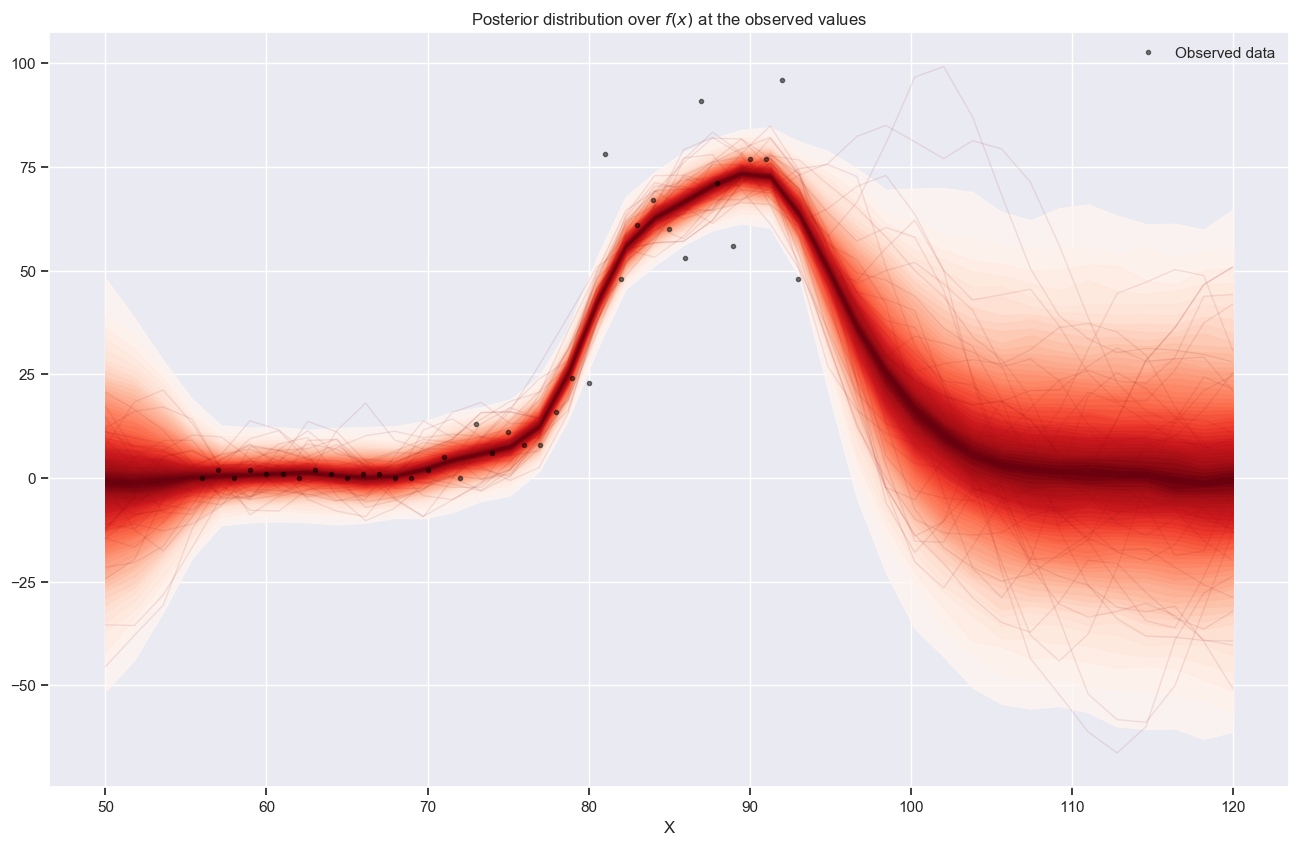

In [51]:
# plot the results
fig = plt.figure(figsize=(16,10), dpi=100)
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new)

# plot the data and the true latent function
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data")

# axis labels and title
plt.xlabel("X")
plt.title("Posterior distribution over $f(x)$ at the observed values")
plt.legend()

C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\matij\Anaconda3\envs\covid-analysis\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as a

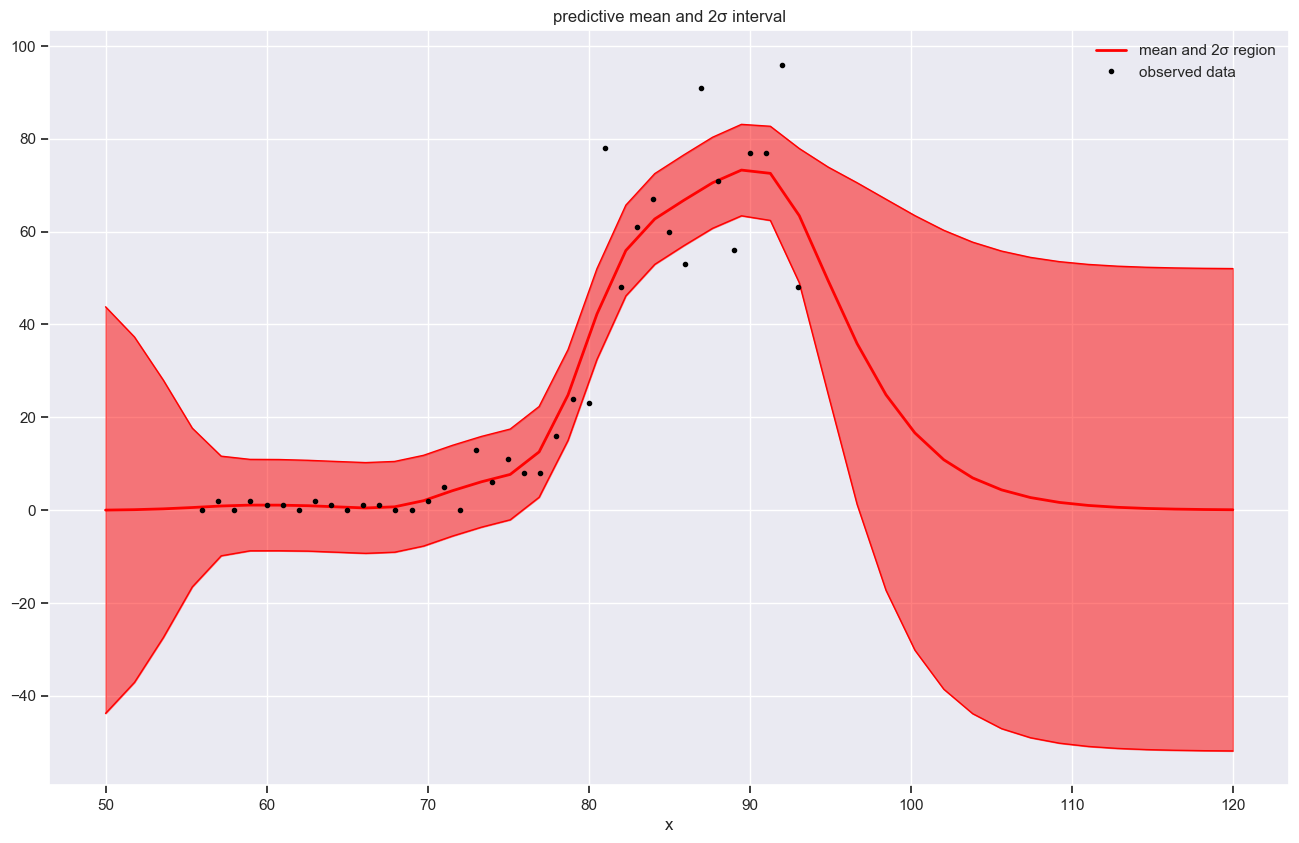

In [52]:
# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)

# draw plot
fig = plt.figure(figsize=(16,10), dpi=100)
ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region")
plt.plot(X_new, mu + 2*sd, 'r', lw=1)
plt.plot(X_new, mu - 2*sd, 'r', lw=1)
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data")

plt.xlabel("x")
plt.title("predictive mean and 2σ interval")
plt.legend()